# Data Gathering


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Water_Quality.csv')
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.112512,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,332.566990,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# Data Cleaning

In [ ]:
# Check if there are null values in the dataset
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
# Checking if there are values that are duplicated
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

# Exploratory Data Analysis


In [ ]:
# Summarizing the data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.081083,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.470256,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.104445,196.967627,20927.833605,7.130299,334.564290,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
stats = df[['ph','Hardness']].agg(['mean','median','std'])
stats

,ph,Hardness
mean,7.081083,196.369496
median,7.104445,196.967627
std,1.470256,32.879761


In [ ]:
correlational_matrix = df.corr()
correlational_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.078850,-0.081895,-0.031893,0.014654,0.017009,0.039866,0.003507,-0.036362,-0.003955
Hardness,0.078850,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081895,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031893,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014654,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025759,-0.009523,-0.026957
Conductivity,0.017009,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.039866,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.003507,-0.012690,-0.008875,0.016627,-0.025759,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036362,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003955,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.006960,0.001581,1.000000


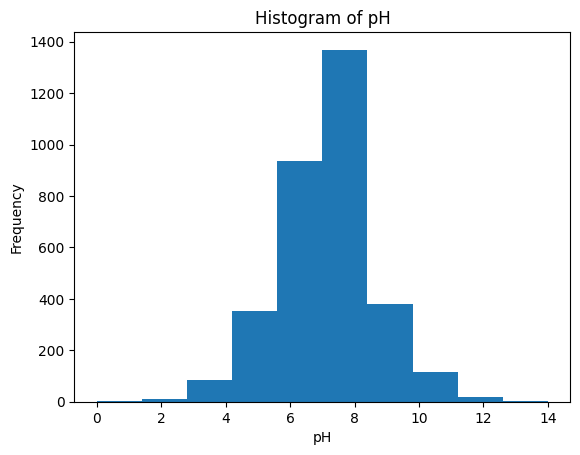

In [ ]:
plt.hist(df['ph'], bins=10)
plt.title('Histogram of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

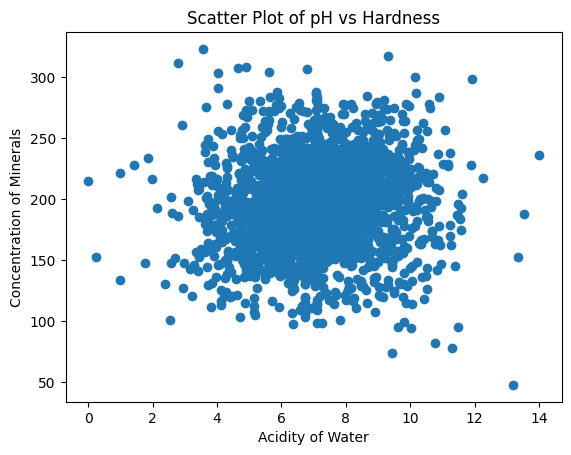

In [ ]:
plt.scatter(df['ph'], df['Hardness'])
plt.title('Scatter Plot of pH vs Hardness')
plt.xlabel('Acidity of Water')
plt.ylabel('Concentration of Minerals')
plt.show()

# Interpretation of Data

In this dataset, I focused on the relationship between the pH and the Hardness, the pH measures the acidity of a water and Hardness determines the concentration of minerals in the water and for it to be clean water, lower hardness is much better.The results for the mean, median, and standard deviation for the pH and the Hardness is no significant differences among its values and it is not skewed. The scatter plot of both variables are clustered, suggesting that it has strong relationship.